<a href="https://colab.research.google.com/github/pseudonihilist/Mankiw-Romer-and-Weil-1992-QJE-/blob/main/MRW_Extended_from_90_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import os

In [ ]:
data = pd.read_excel("MRW_extention.xlsx")
data.head()

,number,country,n,i,o,rgdpw90,rgdpw18,gdpgrowth,popgrowth,i_y,school
0,1,Angola,1,0,0,5446.113163,14909.080121,0.041027,0.033637,0.29402,1.474635
1,2,Benin,1,0,0,3645.470495,8213.646765,0.032221,0.029769,0.31165,1.879319
2,3,Botswana,1,1,0,22282.811487,41732.883311,0.023059,0.021241,0.47213,2.911752
3,4,Burkina Faso,1,0,0,2420.686988,6001.995108,0.029865,0.028324,0.29650,1.272307
4,5,Burundi,1,0,0,1931.922447,1761.113517,-0.002249,0.024637,0.16591,1.402834


#### Reformatting the data

In [ ]:
#convenience stuff
data = data.drop(data.columns[0], axis = 1)
data = data.set_index('country')

#creating desired variables
data['lngd'] = np.log(data['popgrowth']/100 + 0.05)
data['ls'] = np.log(data['i_y']/100)
data['const'] = 1
data['ls_lngd'] = data['ls'] - data['lngd']

In [ ]:
data.head()

,n,i,o,rgdpw90,rgdpw18,gdpgrowth,popgrowth,i_y,school,lngd,ls,const,ls_lngd
country,,,,,,,,,,,,,
Angola,1,0,0,5446.113163,14909.080121,0.041027,0.033637,0.29402,1.474635,-2.989027,-5.829278,1,-2.840250
Benin,1,0,0,3645.470495,8213.646765,0.032221,0.029769,0.31165,1.879319,-2.989796,-5.771045,1,-2.781249
Botswana,1,1,0,22282.811487,41732.883311,0.023059,0.021241,0.47213,2.911752,-2.991493,-5.355671,1,-2.364178
Burkina Faso,1,0,0,2420.686988,6001.995108,0.029865,0.028324,0.29650,1.272307,-2.990083,-5.820878,1,-2.830795
Burundi,1,0,0,1931.922447,1761.113517,-0.002249,0.024637,0.16591,1.402834,-2.990817,-6.401480,1,-3.410663


In [ ]:
data['lschool'] = np.log(data['school'])
data['lsch_ngd'] = data['lschool'] - data['lngd']
data['ly90'] = np.log(data['rgdpw90'])
data['ly18'] = np.log(data['rgdpw18'])
data['linv'] = np.log(data['i_y'])

#subsetting data
data_reg = data.loc[data['n'] == 1, :] #no oil
data_d = data_reg[data_reg.i == 1] #pop in 1960 less than 1 mil
data_oecd = data_reg[data_reg.o == 1] #oecd

In [ ]:
data.head()

,n,i,o,rgdpw90,rgdpw18,gdpgrowth,popgrowth,i_y,school,lngd,ls,const,ls_lngd,lschool,lsch_ngd,ly90,ly18,linv
country,,,,,,,,,,,,,,,,,,
Angola,1,0,0,5446.113163,14909.080121,0.041027,0.033637,0.29402,1.474635,-2.989027,-5.829278,1,-2.840250,0.388410,3.377437,8.602657,9.609726,-1.224107
Benin,1,0,0,3645.470495,8213.646765,0.032221,0.029769,0.31165,1.879319,-2.989796,-5.771045,1,-2.781249,0.630910,3.620706,8.201241,9.013552,-1.165875
Botswana,1,1,0,22282.811487,41732.883311,0.023059,0.021241,0.47213,2.911752,-2.991493,-5.355671,1,-2.364178,1.068755,4.060248,10.011571,10.639045,-0.750501
Burkina Faso,1,0,0,2420.686988,6001.995108,0.029865,0.028324,0.29650,1.272307,-2.990083,-5.820878,1,-2.830795,0.240832,3.230915,7.791807,8.699847,-1.215708
Burundi,1,0,0,1931.922447,1761.113517,-0.002249,0.024637,0.16591,1.402834,-2.990817,-6.401480,1,-3.410663,0.338494,3.329311,7.566271,7.473702,-1.796310


### Unrestricted Model

In [ ]:
#no restrictions on coefficients here
reg1 = sm.OLS(endog = data_reg['ly18'],
              exog = data_reg[['const', 'ls', 'lngd']],
             missing = 'drop').fit()

reg2 = sm.OLS(endog = data_d['ly18'],
             exog = data_d[['const', 'ls', 'lngd']],
             missing = 'drop').fit()

reg3 = sm.OLS(endog = data_oecd['ly18'],
             exog = data_oecd[['const', 'ls', 'lngd']],
             missing = 'drop').fit()

### Restricted Model

In [ ]:
#coeff(log(savings)) = -coeff(log(n+g+d))
regr1 = sm.OLS(endog = data_reg['ly18'],
             exog = data_reg[['const', 'ls_lngd']],
             missing = 'drop').fit()

regr2 = sm.OLS(endog = data_d['ly18'],
             exog = data_d[['const', 'ls_lngd']],
             missing = 'drop').fit()

regr3 = sm.OLS(endog = data_oecd['ly18'],
             exog = data_oecd[['const', 'ls_lngd']],
             missing = 'drop').fit()

### Table 1

In [ ]:
info_dict = {'R^2': lambda x: x.rsquared_adj,
            'N': lambda x: x.nobs,
            's.e.e.': lambda x: np.sqrt(x.scale),
            'Implied α': lambda x: f"{x.params[1]/(1 + x.params[1]):.2f}"}

results_unres = summary_col(results = [reg1, reg2, reg3],
                           float_format='%0.2f',
                           stars = True,
                           model_names = ['Non-Oil',
                                         'Intermediate',
                                         'OECD'],
                           info_dict = info_dict,
                           regressor_order = ['const',
                                             'ls',
                                             'lngd'])


results_res = summary_col(results = [regr1, regr2, regr3],
                           float_format='%0.2f',
                           stars = True,
                           model_names = ['Non-Oil',
                                         'Intermediate',
                                         'OECD'],
                           info_dict = info_dict,
                           regressor_order = ['const',
                                             'ls',
                                             'ls_lngd'])


results_res.add_title('Restricted Regressions')
results_unres.add_title('Unrestricted Regressions')
print(results_unres)
print('')
print(results_res)

            Unrestricted Regressions
                 Non-Oil   Intermediate   OECD  
------------------------------------------------
const          -1221.92*** -928.66***   172.04  
               (161.03)    (176.22)     (178.56)
ls             0.48**      0.42*        0.41**  
               (0.23)      (0.25)       (0.16)  
lngd           -412.73***  -314.68***   52.82   
               (53.83)     (58.93)      (59.69) 
R-squared      0.49        0.36         0.31    
R-squared Adj. 0.47        0.34         0.24    
R^2            0.4697      0.3386       0.2351  
N              68.0000     55.0000      21.0000 
s.e.e.         0.8050      0.7029       0.2115  
Implied α      0.32        0.30         0.29    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01

           Restricted Regressions
               Non-Oil  Intermediate   OECD  
---------------------------------------------
const          11.50*** 11.48***     12.74***
               (0.94)   (0.88)       (0.45)  

### Unrestricted Model

In [ ]:
#no restrictions on coefficients here
regh1 = sm.OLS(endog = data_reg['ly18'],
             exog = data_reg[['const', 'ls', 'lngd', 'lschool']],
             missing = 'drop').fit()

regh2 = sm.OLS(endog = data_d['ly18'],
             exog = data_d[['const', 'ls', 'lngd', 'lschool']],
             missing = 'drop').fit()

regh3 = sm.OLS(endog = data_oecd['ly18'],
             exog = data_oecd[['const', 'ls', 'lngd', 'lschool']],
             missing = 'drop').fit()

### Restricted Model

In [ ]:
#coeff(log(savings)) = -coeff(log(n+g+d))
reghr1 = sm.OLS(endog = data_reg['ly18'],
             exog = data_reg[['const', 'ls_lngd', 'lsch_ngd']],
             missing = 'drop').fit()

reghr2 = sm.OLS(endog = data_d['ly18'],
             exog = data_d[['const', 'ls_lngd', 'lsch_ngd']],
             missing = 'drop').fit()

reghr3 = sm.OLS(endog = data_oecd['ly18'],
             exog = data_oecd[['const', 'ls_lngd', 'lsch_ngd']],
             missing = 'drop').fit()

In [ ]:
info_dictu = {'R^2': lambda x: x.rsquared_adj,
            'N': lambda x: x.nobs,
            's.e.e.': lambda x: np.sqrt(x.scale),
            'Implied α': lambda x: f"{x.params[1]/(1 + x.params[1] + x.params[3]):.2f}",
            'Implied β': lambda x: f"{x.params[3]/(1 + x.params[1] + x.params[3]):.2f}"}

info_dictr = {'R^2': lambda x: x.rsquared_adj,
            'N': lambda x: x.nobs,
            's.e.e.': lambda x: np.sqrt(x.scale),
            'Implied α': lambda x: f"{x.params[1]/(1 + x.params[1] + x.params[2]):.2f}",
            'Implied β': lambda x: f"{x.params[2]/(1 + x.params[1] + x.params[2]):.2f}"}

results_unres = summary_col(results = [regh1, regh2, regh3],
                           float_format='%0.2f',
                           stars = True,
                           model_names = ['Non-Oil',
                                         'Intermediate',
                                         'OECD'],
                           info_dict = info_dictu,
                           regressor_order = ['const',
                                             'ls',
                                             'lngd',
                                             'lschool'])


results_res = summary_col(results = [reghr1, reghr2, reghr3],
                           float_format='%0.2f',
                           stars = True,
                           model_names = ['Non-Oil',
                                         'Intermediate',
                                         'OECD'],
                           info_dict = info_dictr,
                           regressor_order = ['const',
                                             'ls',
                                             'ls_lngd',
                                             'lsch_ngd'])


results_res.add_title('Restricted Regressions')
results_unres.add_title('Unrestricted Regressions')
print(results_unres)
print('')
print(results_res)

           Unrestricted Regressions
                Non-Oil   Intermediate   OECD  
-----------------------------------------------
const          -393.31*** -404.47***   110.69  
               (141.56)   (125.39)     (117.01)
ls             0.38**     0.47***      0.67*** 
               (0.16)     (0.16)       (0.12)  
lngd           -134.81*** -138.58***   32.40   
               (47.39)    (41.97)      (39.11) 
lschool        2.62***    2.99***      1.48*** 
               (0.29)     (0.33)       (0.29)  
R-squared      0.77       0.75         0.72    
R-squared Adj. 0.76       0.74         0.68    
R^2            0.7628     0.7380       0.6751  
N              68.0000    55.0000      21.0000 
s.e.e.         0.5383     0.4424       0.1378  
Implied α      0.09       0.10         0.21    
Implied β      0.66       0.67         0.47    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01

          Restricted Regressions
               Non-Oil Intermediate   OECD 
-----------

In [ ]:
regcon1 = sm.OLS(endog = (data_reg['ly18'] - data_reg['ly90']),
               exog = data_reg[['const', 'ly18']],
               missing = 'drop').fit()

regcon2 = sm.OLS(endog = (data_d['ly18'] - data_d['ly90']),
               exog = data_d[['const', 'ly18']],
               missing = 'drop').fit()

regcon3 = sm.OLS(endog = (data_oecd['ly18'] - data_oecd['ly90']),
               exog = data_oecd[['const', 'ly18']],
               missing = 'drop').fit()

In [ ]:
info_dictroc = {'R^2': lambda x: x.rsquared_adj,
            'N': lambda x: x.nobs,
            's.e.e.': lambda x: np.sqrt(x.scale),
            'Implied λ': lambda x: f"{-np.log(x.params[1] + 1)/25:.5f}"}

table_roc = summary_col(results = [regcon1, regcon2, regcon3],
                           float_format='%0.5f',
                           stars = True,
                           model_names = ['Non-Oil',
                                         'Intermediate',
                                         'OECD'],
                           info_dict = info_dictroc,
                           regressor_order = ['const',
                                             'ly18'])

table_roc.add_title('Tests for Unconditional Convergence')
print(table_roc)

      Tests for Unconditional Convergence
                Non-Oil  Intermediate    OECD  
-----------------------------------------------
const          -0.43013  -0.46833     -4.49062 
               (0.45464) (0.67589)    (3.33935)
ly18           0.10154** 0.10317      0.44409  
               (0.04351) (0.06290)    (0.28981)
R-squared      0.07624   0.04830      0.10999  
R-squared Adj. 0.06224   0.03034      0.06315  
R^2            0.0622    0.0303       0.0631   
N              68.0000   55.0000      21.0000  
s.e.e.         0.3937    0.3995       0.3134   
Implied λ      -0.00387  -0.00393     -0.01470 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
regcon4 = sm.OLS(endog = (data_reg['ly18'] - data_reg['ly90']),
               exog = data_reg[['const', 'ly90', 'ls', 'lngd']],
               missing = 'drop').fit()

regcon5 = sm.OLS(endog = (data_d['ly18'] - data_d['ly90']),
               exog = data_d[['const', 'ly90', 'ls', 'lngd']],
               missing = 'drop').fit()

regcon6 = sm.OLS(endog = (data_oecd['ly18'] - data_oecd['ly90']),
               exog = data_oecd[['const', 'ly90', 'ls', 'lngd']],
               missing = 'drop').fit()



regcon7 = sm.OLS(endog = (data_reg['ly18'] - data_reg['ly90']),
               exog = data_reg[['const', 'ly90', 'ls', 'lngd', 'lschool']],
               missing = 'drop').fit()

regcon8 = sm.OLS(endog = (data_d['ly18'] - data_d['ly18']),
               exog = data_d[['const', 'ly90', 'ls', 'lngd', 'lschool']],
               missing = 'drop').fit()

regcon9 = sm.OLS(endog = (data_oecd['ly18'] - data_oecd['ly18']),
               exog = data_oecd[['const', 'ly90', 'ls', 'lngd', 'lschool']],
               missing = 'drop').fit()

In [ ]:
info_dictroc2 = {'R^2': lambda x: x.rsquared_adj,
            'N': lambda x: x.nobs,
            's.e.e.': lambda x: np.sqrt(x.scale),
            'Implied λ': lambda x: f"{-np.log(x.params[1] + 1)/25:.5f}"}

table_roc2 = summary_col(results = [regcon4, regcon5, regcon6],
                           float_format='%0.5f',
                           stars = True,
                           model_names = ['Non-Oil',
                                         'Intermediate',
                                         'OECD'],
                           info_dict = info_dictroc,
                           regressor_order = ['const',
                                             'ly90',
                                             'ls',
                                             'lngd'])


table_roc3 = summary_col(results = [regcon7, regcon8, regcon9],
                           float_format='%0.5f',
                           stars = True,
                           model_names = ['Non-Oil',
                                         'Intermediate',
                                         'OECD'],
                           info_dict = info_dictroc,
                           regressor_order = ['const',
                                             'ly90',
                                             'ls',
                                             'lngd',
                                             'lschool'])

table_roc2.add_title('Tests for Conditional Convergence')
table_roc3.add_title('Tests for Conditional Convergence')
print(table_roc2)
print(" ")
print(table_roc3)

         Tests for Conditional Convergence
                 Non-Oil   Intermediate     OECD   
---------------------------------------------------
const          -124.22978  -147.73274   108.07097  
               (106.98651) (112.59975)  (161.57487)
ly90           -0.08962    -0.15903**   -0.69602***
               (0.06148)   (0.07063)    (0.12827)  
ls             0.33559***  0.41837***   0.43607*** 
               (0.11186)   (0.12904)    (0.14433)  
lngd           -42.67624   -50.92778    32.50030   
               (35.91151)  (37.78338)   (53.93434) 
R-squared      0.14050     0.23530      0.71141    
R-squared Adj. 0.10021     0.19031      0.66048    
R^2            0.1002      0.1903       0.6605     
N              68.0000     55.0000      21.0000    
s.e.e.         0.3856      0.3651       0.1887     
Implied λ      0.00376     0.00693      0.04763    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
 
        Tests for Conditional Convergence
                 Non-O

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [ ]:
regconr1 = sm.OLS(endog = (data_reg['ly18'] - data_reg['ly90']),
               exog = data_reg[['const', 'ly90', 'ls_lngd', 'lsch_ngd']],
               missing = 'drop').fit()

regconr2 = sm.OLS(endog = (data_d['ly18'] - data_d['ly90']),
               exog = data_d[['const', 'ly90', 'ls_lngd', 'lsch_ngd']],
               missing = 'drop').fit()

regconr3 = sm.OLS(endog = (data_oecd['ly18'] - data_oecd['ly90']),
               exog = data_oecd[['const', 'ly90', 'ls_lngd', 'lsch_ngd']],
               missing = 'drop').fit()

### Replicating Figure 1

In [ ]:
info_dictrocr = {'R^2': lambda x: x.rsquared_adj,
            'N': lambda x: x.nobs,
            's.e.e.': lambda x: np.sqrt(x.scale),
            'Implied λ': lambda x: f"{-np.log(x.params[1] + 1)/25:.5f}"}
table_rocr = summary_col(results = [regconr1, regconr2, regconr3],
                           float_format='%0.5f',
                           stars = True,
                           model_names = ['Non-Oil',
                                         'Intermediate',
                                         'OECD'],
                           info_dict = info_dictroc,
                           regressor_order = ['const',
                                             'ly90',
                                             'ls_lngd', 
                                              'lsch_ngd'])

table_rocr.add_title('Rate of Convergence - Restricted')
print(table_rocr)

         Rate of Convergence - Restricted
                 Non-Oil   Intermediate     OECD   
---------------------------------------------------
const          0.48403     -0.04364     6.31858*** 
               (0.68100)   (0.95179)    (1.22090)  
ly90           -0.25022*** -0.35388***  -0.85349***
               (0.07673)   (0.08232)    (0.09738)  
ls_lngd        0.32420***  0.42535***   0.66730*** 
               (0.10418)   (0.11501)    (0.11161)  
lsch_ngd       0.89394***  1.35208***   1.31186*** 
               (0.27381)   (0.34852)    (0.30695)  
R-squared      0.24720     0.38884      0.85783    
R-squared Adj. 0.21191     0.35289      0.83274    
R^2            0.2119      0.3529       0.8327     
N              68.0000     55.0000      21.0000    
s.e.e.         0.3609      0.3264       0.1324     
Implied λ      0.01152     0.01747      0.07683    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## Replicating plots

First we carry out some regressions for panel B and C to get out the residuals we need

In [ ]:
reg_plt2 = sm.OLS(data_d['ly90'],
                 data_d[['lngd', 'linv']],
                 missing = 'drop').fit()
residly181 = reg_plt2.resid

reg_plt3 = sm.OLS(data_d['ly18'] - data_d['ly90'],
                 data_d[['lngd', 'linv']],
                 missing = 'drop').fit()
residgr1 = reg_plt3.resid




reg_plt4 = sm.OLS(data_d['ly90'],
                 data_d[['lngd', 'linv', 'lschool']],
                 missing = 'drop').fit()
residly182 = reg_plt4.resid

reg_plt5 = sm.OLS(data_d['ly18'] - data_d['ly90'],
                 data_d[['lngd', 'linv', 'lschool']],
                 missing = 'drop').fit()
residgr2 = reg_plt5.resid



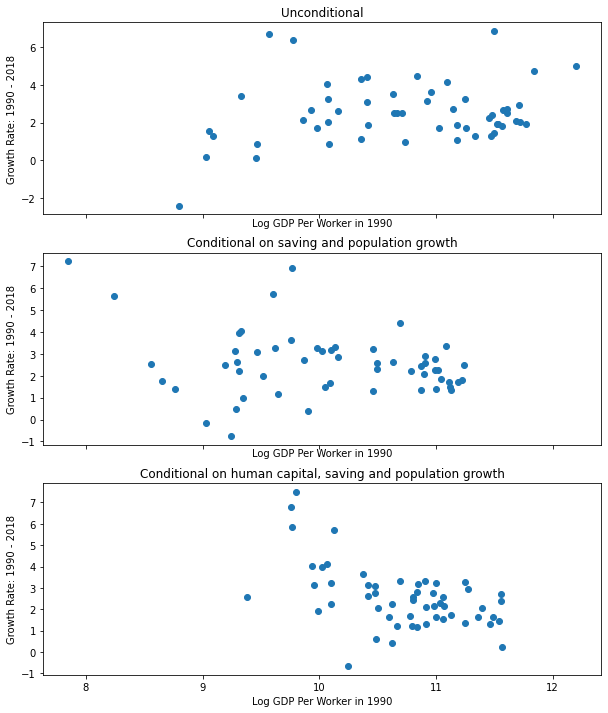

In [ ]:
fig, ax = plt.subplots(3, 1, sharex = 'col', figsize = (10, 12))
ax[0].scatter(data_d['ly18'], (data_d['ly18'] - data_d['ly90'])*100/25)
ax[0].set_xlabel('Log GDP Per Worker in 1990')
ax[0].set_ylabel('Growth Rate: 1990 - 2018')
ax[0].set_title('Unconditional')


ax[1].scatter(residly181 + np.mean(data_d['ly90']), 
           (residgr1 + np.mean(data_d['ly18'] - data_d['ly90']))*100/25)
ax[1].set_xlabel('Log GDP Per Worker in 1990')
ax[1].set_ylabel('Growth Rate: 1990 - 2018')
ax[1].set_title('Conditional on saving and population growth')


ax[2].scatter(residly182 + np.mean(data_d['ly18']), 
           (residgr2 + np.mean(data_d['ly18'] - data_d['ly90']))*100/25)
ax[2].set_xlabel('Log GDP Per Worker in 1990')
ax[2].set_ylabel('Growth Rate: 1990 - 2018')
ax[2].set_title('Conditional on human capital, saving and population growth')
plt.show()

### Thank You